## Experiments: Sensitive Analysis Hyperparameter RSAST:


It is runned RSAST in a set of UCR datasets with a predefined number of runs ("runs"). Then, it is selected a range ("range_total") between 1, 10, 30 ,50 and 100 for the selected dataset.

In [1]:
#configure directory to import sast libraries
import sys 
import os 
#add sast library path
file_path = os.path.expanduser("~/random_sast/sast")
#file_path = r"C:\Users\Public\random_sast\sast"
sys.path.append(file_path)
#add cd_diagram library path
file_path = os.path.expanduser("~/random_sast/cd_diagram")
#file_path = r"C:\Users\Public\random_sast\cd_diagram"
sys.path.append(file_path)

sys.path

['/home/nirojasvar/random_sast/ExperimentationRSAST',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python310.zip',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/lib-dynload',
 '',
 '/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages',
 '/home/nirojasvar/random_sast/sast',
 '/home/nirojasvar/random_sast/cd_diagram']

In [2]:
from sast import *
import pandas as pd
import researchpy
import math
import matplotlib.pyplot as plt

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


### Reading Datasets

In [3]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]


In [4]:
df_other_methods['method'].unique()

array(['SAST', 'ROCKET', 'HIVE-COTEv1', 'BOSS', 'RISE', 'TSF',
       'InceptionTime', 'TS-CHIEF', 'S-BOSS', 'STC', 'ResNet',
       'ProximityForest', 'WEASEL', 'Catch22', 'cBOSS'], dtype=object)

In [5]:
# Set directory where the csv files are located
directory = os.getcwd()+'/ResultsRsast'
#directory = os.getcwd()+'/results_accuracy_per_ds'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.startswith("df_overall_tunning") and filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        df['rpoint']=df['rpoint'].astype(str)
        df['nb_per_class']=df['nb_per_class'].astype(str)
        df['rpoint']=df['rpoint'].replace("(lenthg ts)//2","half_len")
        df['nb_per_class']=df['nb_per_class'].replace("(max instances per class)//2","half_instance")
        df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
        df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
df_result.head(3)


/tmp/ipykernel_4055/1216653100.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_4055/1216653100.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_4055/1216653100.py:19: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(lenthg ts\)//2","half_len")
/tmp/ipykernel_4055/1216653100.py:20: FutureWarning: The default value of regex will change from True to False in a future version.
  df['classifier_name']=df['classifier_name'].str.replace("\(max instances per class\)//2","half_instance")
/tmp/ipykernel_4055/1216653100.py:19: FutureWarning: The default value of rege

,Unnamed: 0,accuracy,time,cweights_time,fsubsequence_time,tdataset_time,tclassifier_time,dataset_name,classifier_name,rpoint,nb_per_class,method,len_method
0,0,0.919203,0.181923,0.013529,0.127419,0.037550,0.002808,SonyAIBORobotSurface2,ACF&PACF: n_random_points=1 nb_inst_per_class=...,1,half_instance,Rsast,ACF&PACF
1,1,0.828961,0.168610,0.021266,0.037572,0.106363,0.002882,SonyAIBORobotSurface2,ACF&PACF: n_random_points= half_len nb_inst_pe...,half_len,1,Rsast,ACF&PACF
2,2,0.876180,1.377738,0.011656,0.138769,1.211099,0.015296,SonyAIBORobotSurface2,ACF&PACF: n_random_points= half_len nb_inst_pe...,half_len,half_instance,Rsast,ACF&PACF


In [6]:
#create dataset to generate cd diagram
df_perf=pd.pivot_table(df_result, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
#df_perf.classifier_name.unique()

In [7]:
#get ds tested overall
df_result['dataset_name'].unique()

array(['SonyAIBORobotSurface2', 'GunPoint', 'Chinatown',
       'DistalPhalanxOutlineCorrect', 'DistalPhalanxOutlineAgeGroup',
       'SmoothSubspace', 'Coffee', 'ShapeletSim', 'ItalyPowerDemand',
       'SyntheticControl'], dtype=object)

In [8]:
#get columns of generated datasets
df_result.columns.unique()

Index(['Unnamed: 0', 'accuracy', 'time', 'cweights_time', 'fsubsequence_time',
       'tdataset_time', 'tclassifier_time', 'dataset_name', 'classifier_name',
       'rpoint', 'nb_per_class', 'method', 'len_method'],
      dtype='object')

In [9]:
#filter dataset for cd-diagrams with the ds that has already tested all combinations of params
param_per_ds=pd.pivot_table(df_perf, index=['dataset_name'],values=['classifier_name'] ,aggfunc='count')
param_per_ds=param_per_ds.reset_index()
complete_ds=param_per_ds[param_per_ds.classifier_name==max(param_per_ds.classifier_name)]["dataset_name"].unique()

complete_ds=complete_ds.tolist()

complete_ds.remove('DistalPhalanxOutlineCorrect')

df_perf=df_perf[df_perf.dataset_name.isin(complete_ds)]
df_result=df_result[df_result.dataset_name.isin(complete_ds)]
df_perf.dataset_name.unique()



array(['Chinatown', 'Coffee', 'DistalPhalanxOutlineAgeGroup', 'GunPoint',
       'ItalyPowerDemand', 'ShapeletSim', 'SmoothSubspace',
       'SonyAIBORobotSurface2', 'SyntheticControl'], dtype=object)

### Hyperparameter Tunning RSAST 

#### Accuracy: Subsequence Lenght Method 

In [30]:
filter_param=df_result
filter_param.dataset_name.unique()

array(['SonyAIBORobotSurface2', 'GunPoint', 'Chinatown',
       'DistalPhalanxOutlineAgeGroup', 'SmoothSubspace', 'Coffee',
       'ShapeletSim', 'ItalyPowerDemand', 'SyntheticControl'],
      dtype=object)

In [10]:
filter_param=df_result[df_result.rpoint=='half_len']
filter_param.rpoint.unique()

array(['half_len'], dtype=object)

In [11]:
filter_param=filter_param[filter_param.nb_per_class=='half_instance']
filter_param.nb_per_class.unique()

array(['half_instance'], dtype=object)

In [31]:
# create a pivot table with the mean of score by dataset
len_method_vs_ds=pd.pivot_table(filter_param, values='accuracy', index=['len_method'],columns=['dataset_name'], aggfunc='mean')
len_method_vs_ds=np.transpose(len_method_vs_ds)#[['ACF','PACF']]
len_method_vs_ds=len_method_vs_ds.reset_index()
df_rocket=df_other_methods[df_other_methods["method"]=="ROCKET"]
merged_df = len_method_vs_ds.merge(df_rocket,left_on='dataset_name', right_on='dataset',  how='left')
merged_df=merged_df.drop('dataset',axis=1)
merged_df

,dataset_name,ACF,ACF&PACF,Max ACF,Max PACF,None,PACF,score,method
0,Chinatown,0.946429,0.965209,0.950462,0.965525,0.952454,0.969606,0.982507,ROCKET
1,Coffee,0.944643,0.999107,0.930357,0.935714,0.985714,0.998214,1.000000,ROCKET
2,DistalPhalanxOutlineAgeGroup,0.716607,0.728897,0.733813,0.727218,0.726079,0.716187,0.748201,ROCKET
3,GunPoint,0.794000,0.971611,0.817389,0.951056,0.941889,0.971000,1.000000,ROCKET
4,ItalyPowerDemand,0.935350,0.941254,0.938751,0.940339,0.938565,0.942136,0.968902,ROCKET
5,ShapeletSim,0.950899,0.888889,0.920423,0.734444,0.667460,0.891799,1.000000,ROCKET
6,SmoothSubspace,0.855778,0.883333,0.865222,0.877444,0.857222,0.887833,0.980000,ROCKET
7,SonyAIBORobotSurface2,0.755553,0.892908,0.747657,0.857704,0.832643,0.892279,0.916055,ROCKET
8,SyntheticControl,0.858583,0.948917,0.858500,0.952583,0.969500,0.950167,1.000000,ROCKET


In [32]:

len_method_vs_ds=pd.pivot_table(filter_param, values='accuracy', index=['len_method'],columns=['dataset_name'], aggfunc='var')
len_method_vs_ds=np.transpose(len_method_vs_ds)#[['ACF','PACF']]
len_method_vs_ds=len_method_vs_ds.reset_index()
len_method_vs_ds

# Summary statistics for a Series (single variable)
researchpy.summary_cont(filter_param.groupby(['len_method'])['accuracy'], conf = 0.95)

,N,Mean,SD,SE,95% Conf.,Interval
len_method,,,,,,
ACF,905,0.8535,0.1165,0.0039,0.8459,0.8611
ACF&PACF,905,0.9030,0.0868,0.0029,0.8974,0.9087
Max ACF,905,0.8559,0.1156,0.0038,0.8484,0.8634
Max PACF,905,0.8740,0.1067,0.0035,0.8670,0.8810
None,905,0.8598,0.1309,0.0043,0.8513,0.8684
PACF,905,0.9028,0.0885,0.0029,0.8971,0.9086


In [33]:
stats = filter_param.groupby(['len_method'])['accuracy'].agg(['mean', 'count', 'std'])

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats.head(10))

                mean  count       std   ci95_hi   ci95_lo
len_method                                               
ACF         0.853502    905  0.116458  0.861090  0.845915
ACF&PACF    0.903027    905  0.086773  0.908681  0.897374
Max ACF     0.855905    905  0.115605  0.863437  0.848373
Max PACF    0.873992    905  0.106690  0.880943  0.867041
None        0.859839    905  0.130852  0.868364  0.851313
PACF        0.902828    905  0.088477  0.908592  0.897063


#### Generate Boxplot Tunning Hyperparameter

In [15]:
df_result.nb_per_class.unique()

array(['half_instance', '1', '10', '30', '50', '100'], dtype=object)

In [16]:
df_result.len_method.unique()

array(['ACF&PACF', 'ACF', 'PACF', 'Max ACF', 'Max PACF', 'None'],
      dtype=object)

['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']


/tmp/ipykernel_4055/1404701429.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']
['1', '10', '100', '30', '50', 'half_len']


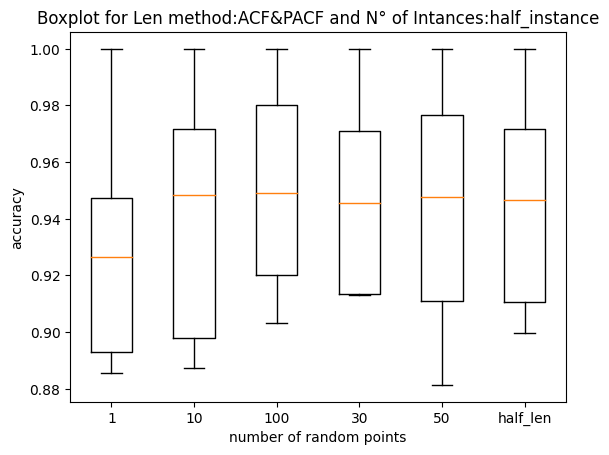

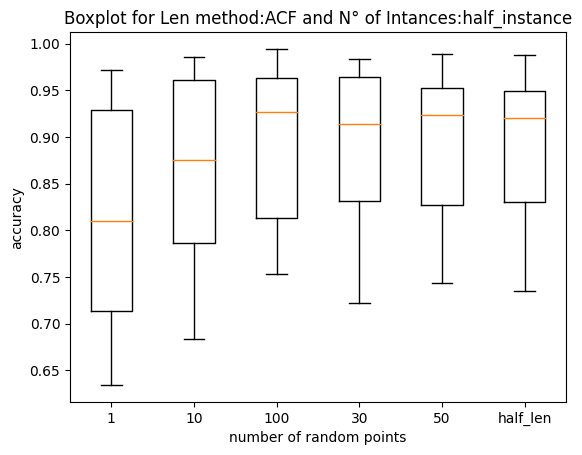

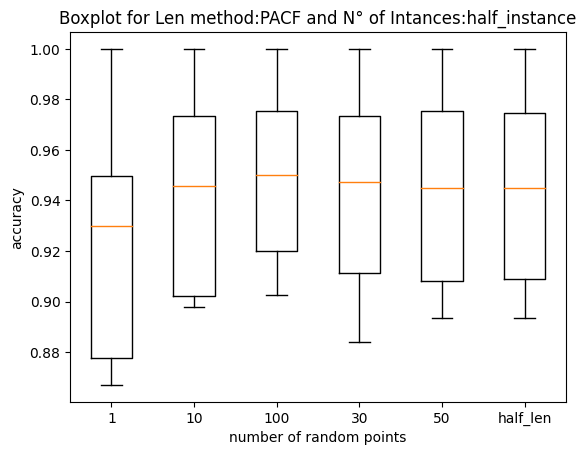

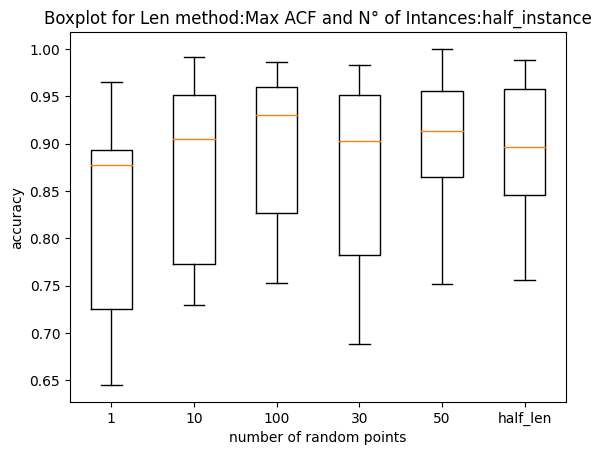

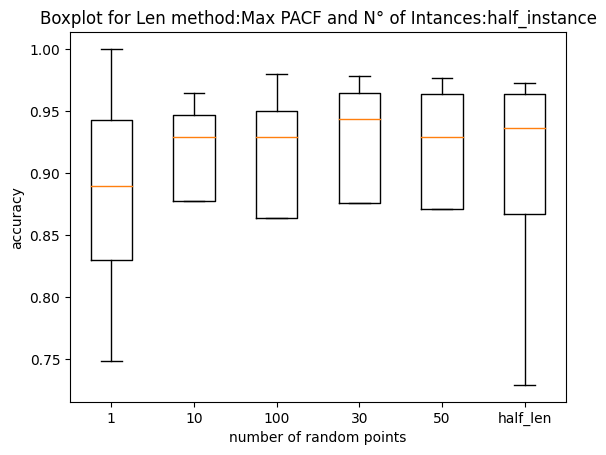

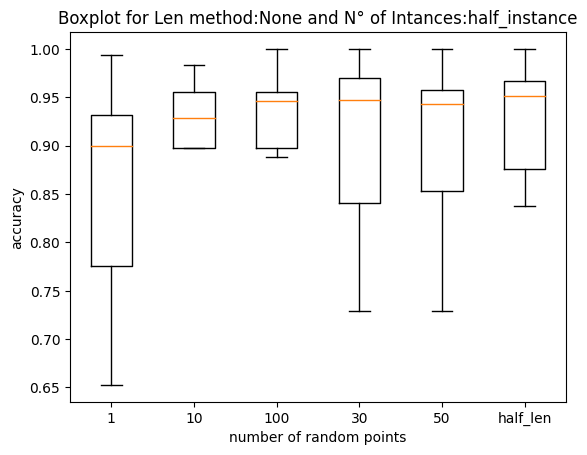

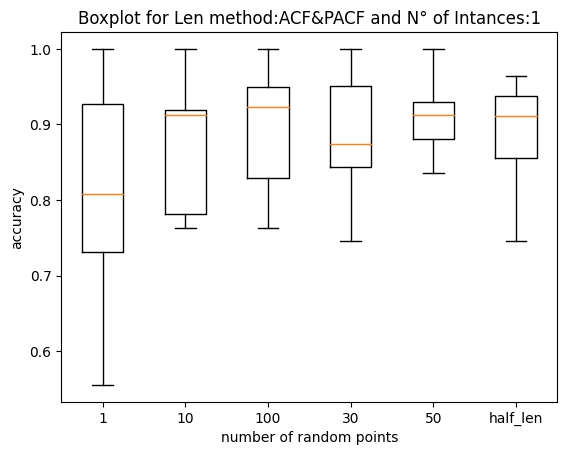

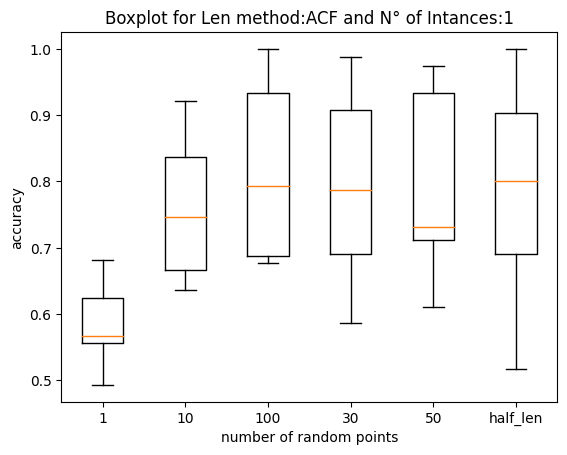

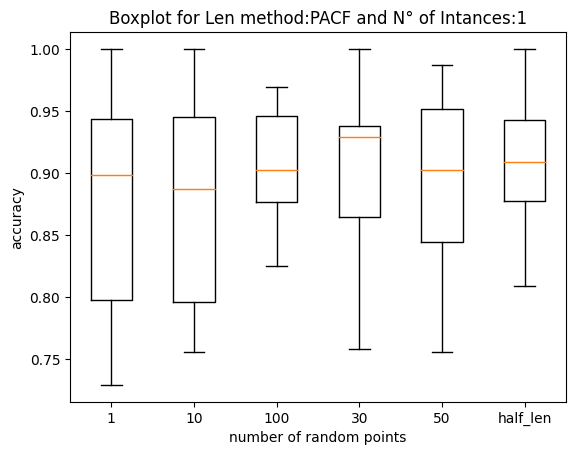

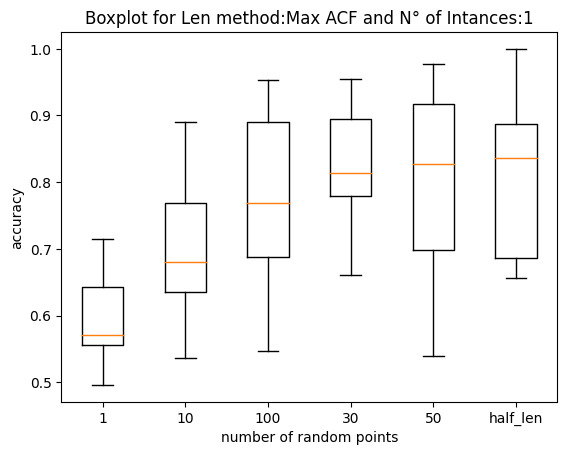

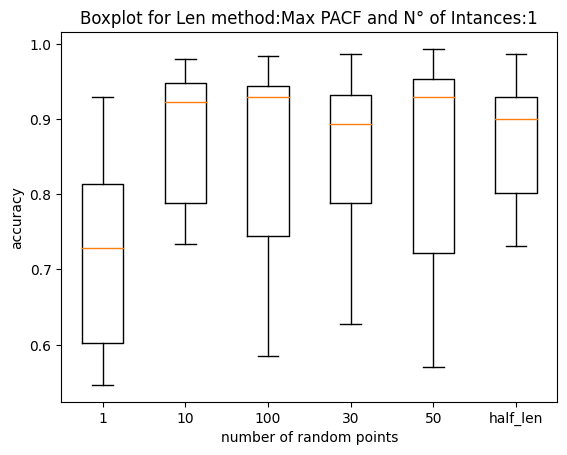

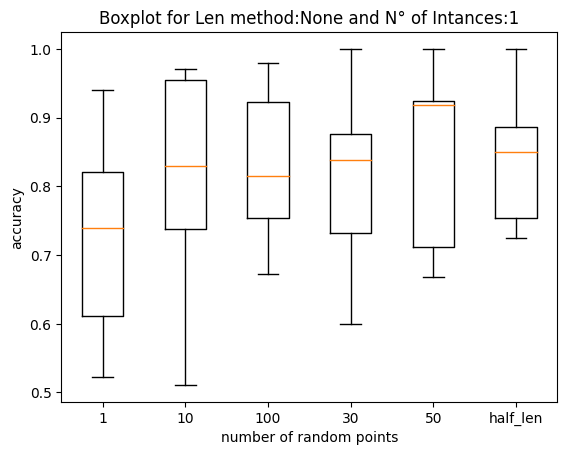

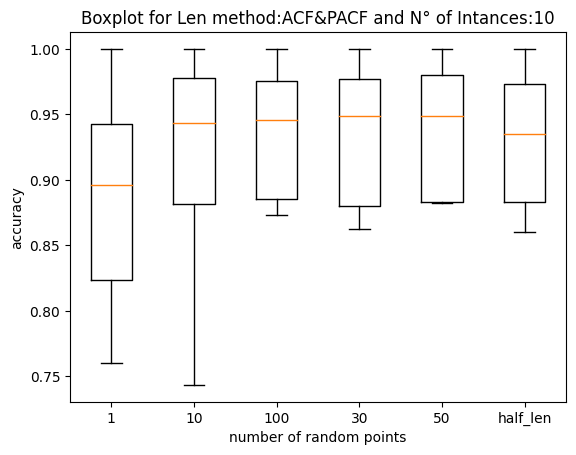

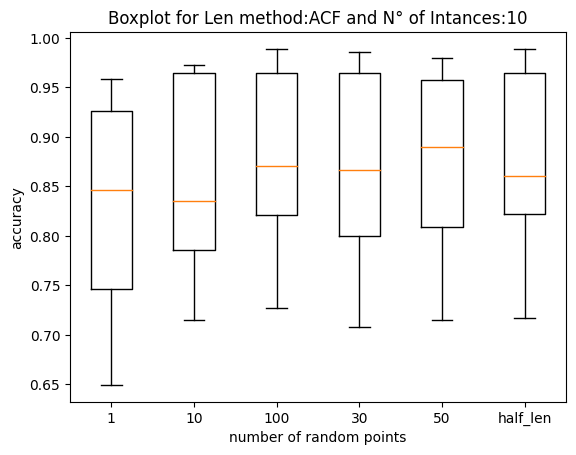

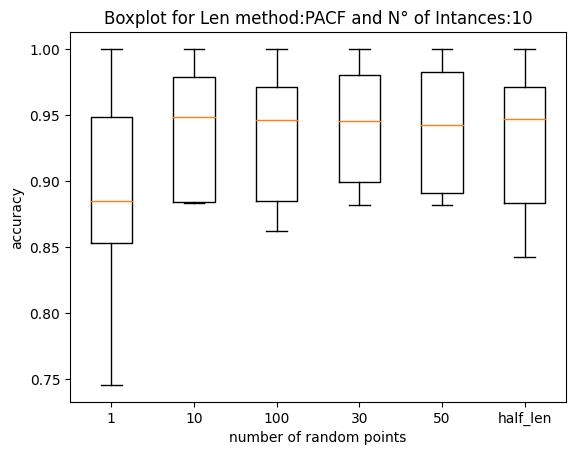

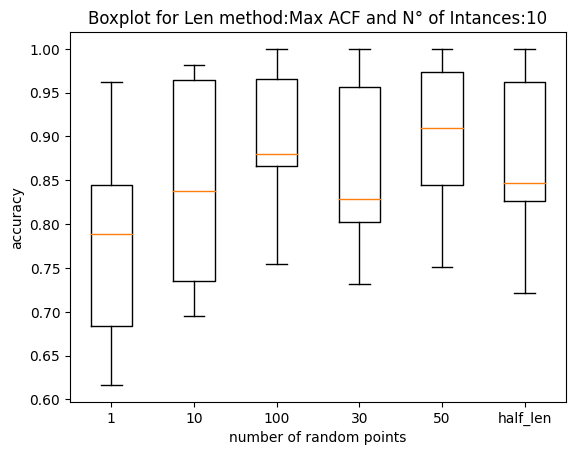

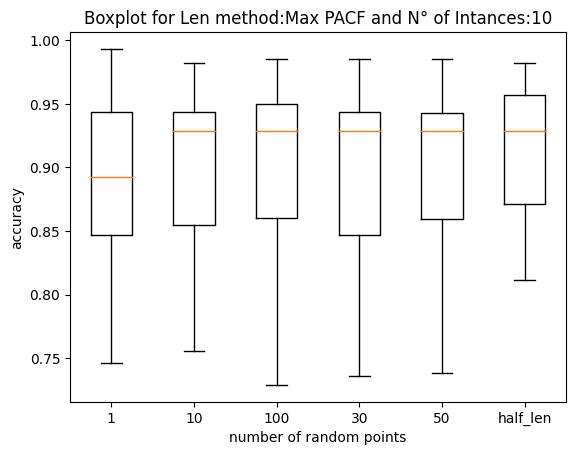

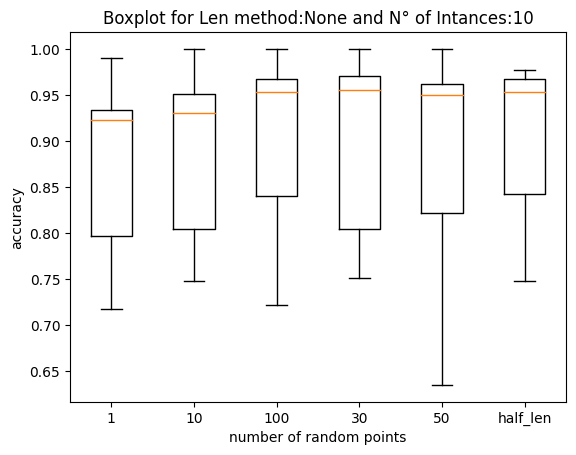

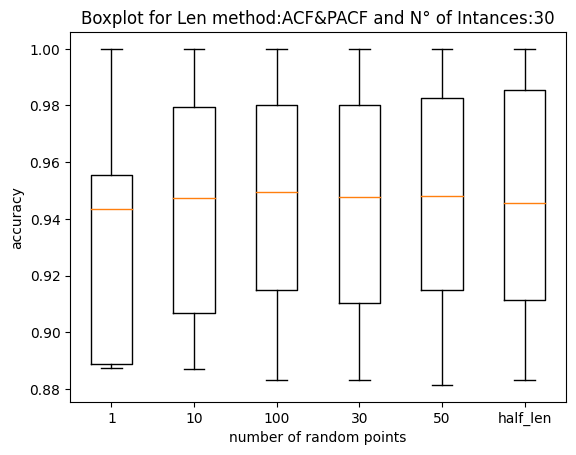

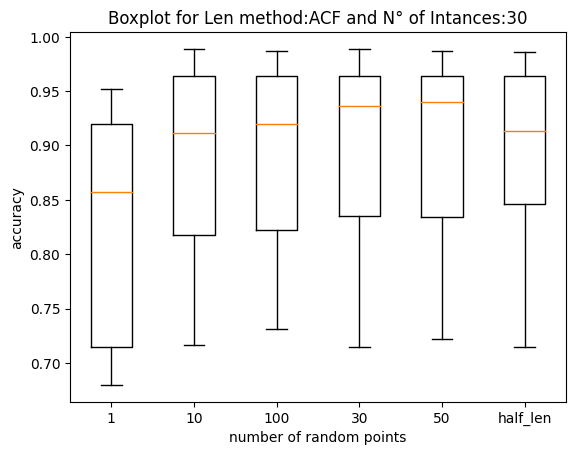

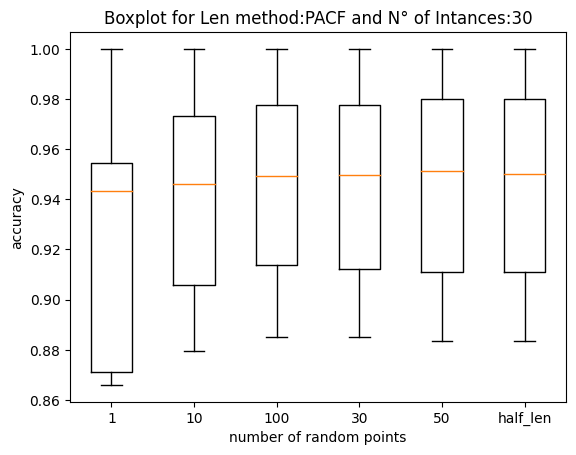

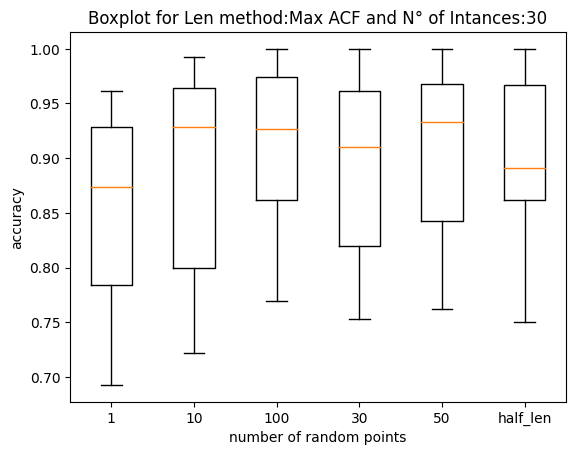

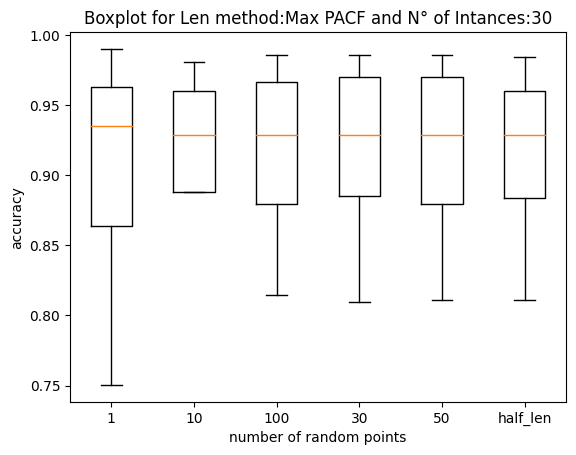

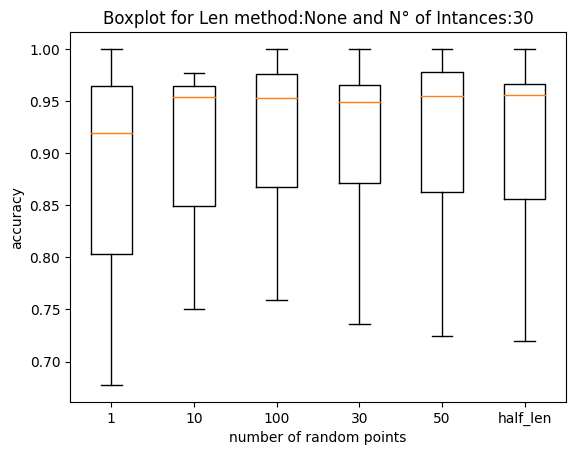

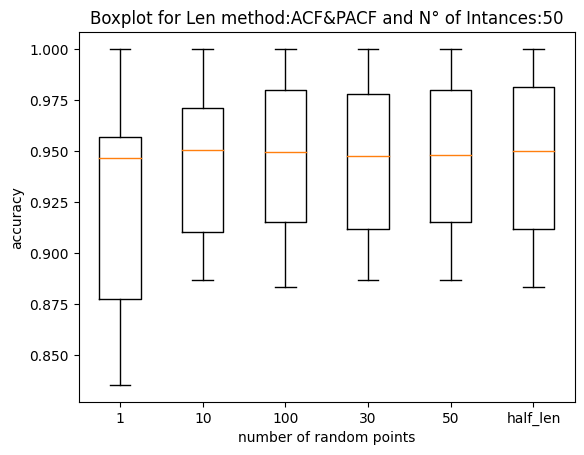

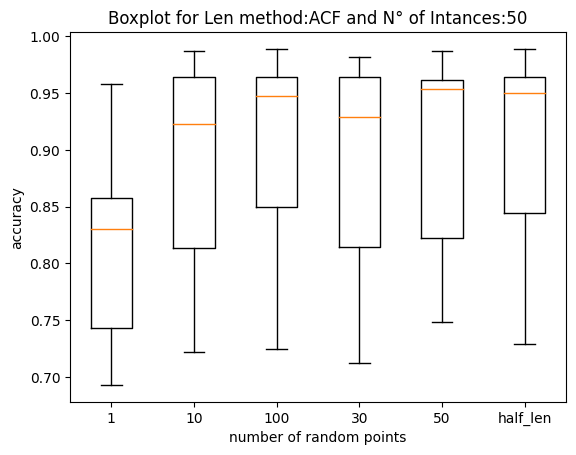

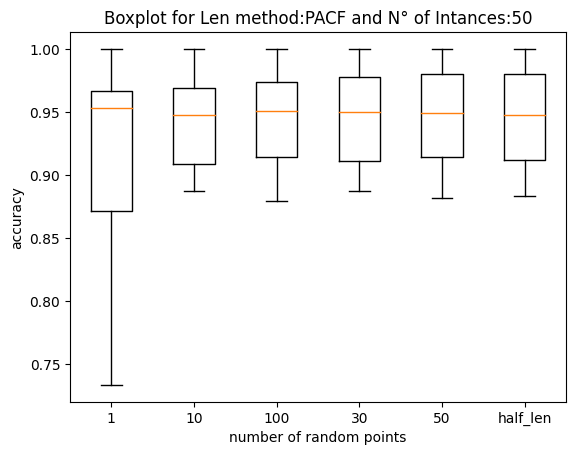

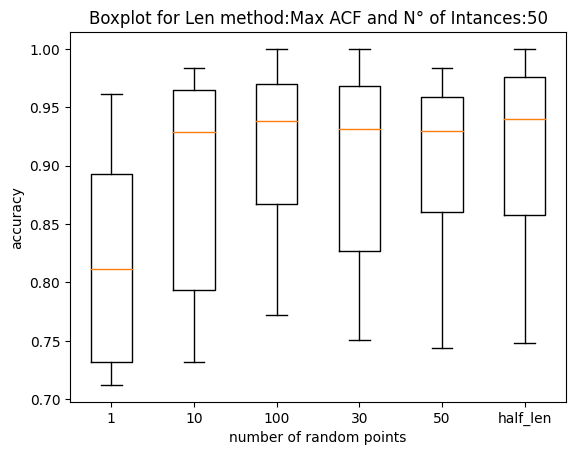

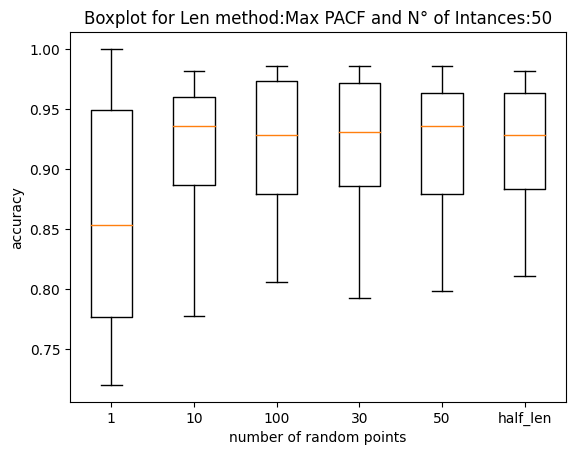

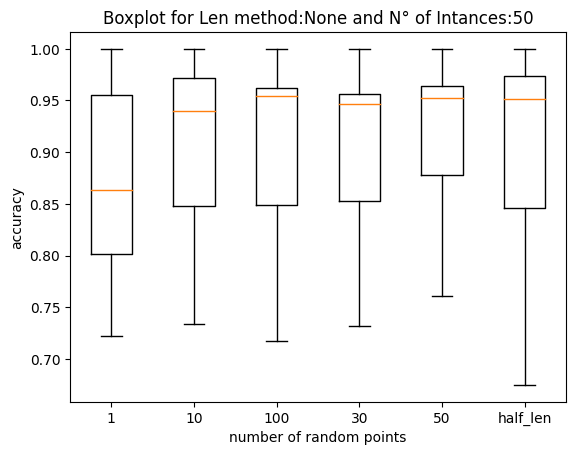

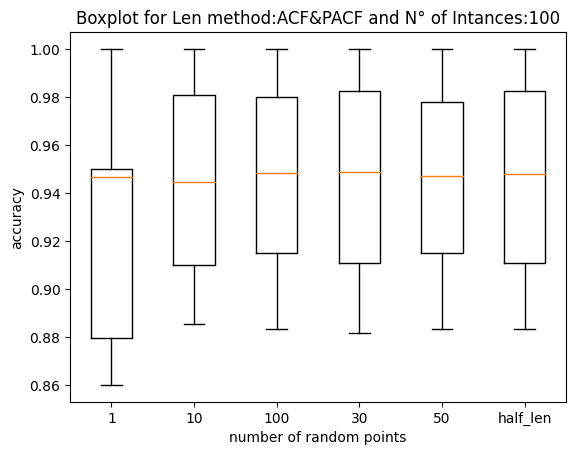

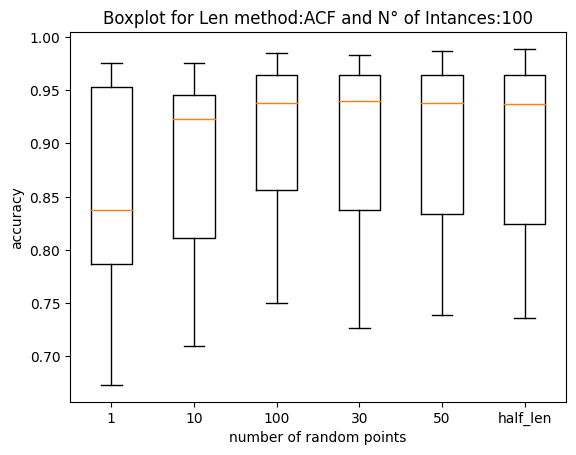

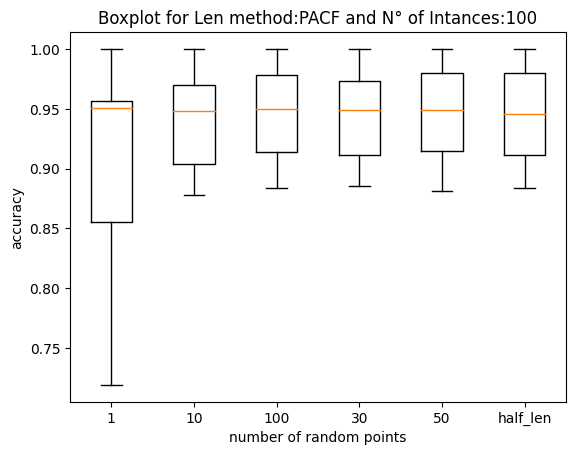

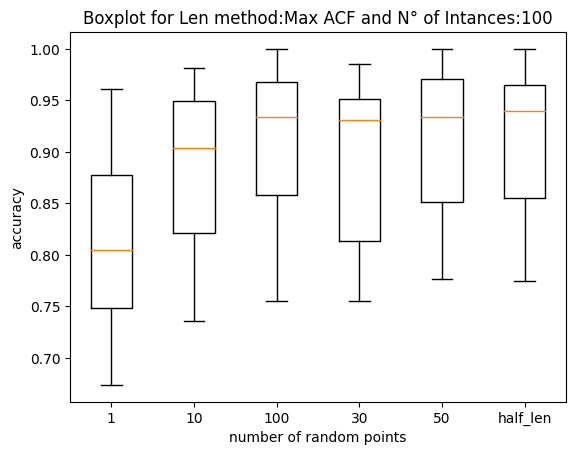

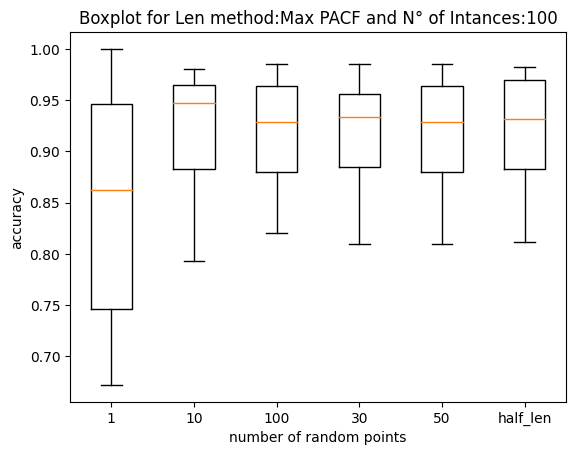

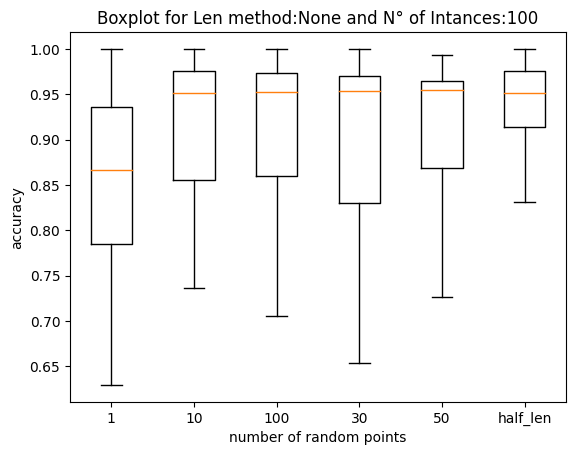

In [17]:
#generate hyperparameter tuning boxplots

df_perf=pd.pivot_table(df_result, values='accuracy', index=['classifier_name','dataset_name','rpoint'], aggfunc='mean')
df_perf=df_perf.reset_index()

for k, ints in enumerate(df_result.nb_per_class.unique()):

    for len_m in df_result.len_method.unique():
        
        
        df_to_cd=df_perf[df_perf.classifier_name.str.contains(r'^'+len_m+':.*nb_inst_per_class='+str(ints)+'$')]
        df_to_cd=pd.pivot_table(df_to_cd, index=['dataset_name'], columns=['rpoint'],values='accuracy')
        
        #print(df_to_cd.head(5))

        # Plot
        fig, ax = plt.subplots()
        ax.boxplot(df_to_cd,0, '')

        # Axis details
        ax.set(xlabel='number of random points', ylabel='accuracy', title='Boxplot for Len method:'+len_m+' and N° of Intances:'+ints)
        plt.xticks([1, 2, 3,4,5,6],list(df_to_cd) )
        print(list(df_to_cd))

        # save plot
        plt.savefig('images_boxplot/boxplot_'+len_m+ints+'.png')




#### Generate CD Diagram Tunning Hyperparameter

In [18]:
from cd_function import *
#generate hyperparameter tuning cd diagrams
for k,ints in enumerate(df_result.nb_per_class.unique()):
   for len_m in df_result.len_method.unique():
      df_to_cd=df_perf[df_perf.classifier_name.str.contains(r'^'+len_m+':.*nb_inst_per_class='+str(ints)+'$')]
      print('len_method'+str(len_m))
      print('nb_per_class'+str(ints))
      draw_cd_diagram(df_to_cd, labels=True, title=len_m +" comparison, nb_inst_per_class="+str(ints), name_file='images_cd_diagram/cd-diagram_'+len_m+ints+'.png')


len_methodACF&PACF
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF
nb_per_classhalf_instance


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodPACF
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax ACF
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodMax PACF
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected
len_methodNone
nb_per_classhalf_instance
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodACF&PACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF
nb_per_class1


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodPACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodMax ACF
nb_per_class1


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodMax PACF
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodNone
nb_per_class1
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodACF
nb_per_class10
len_methodPACF
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodMax ACF
nb_per_class10
len_methodMax PACF
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodNone
nb_per_class10
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodACF
nb_per_class30
len_methodPACF
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodMax ACF
nb_per_class30
len_methodMax PACF
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodNone
nb_per_class30
the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodACF
nb_per_class50
len_methodPACF
nb_per_class50


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

the null hypothesis over the entire classifiers cannot be rejected
len_methodMax ACF
nb_per_class50


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


len_methodMax PACF
nb_per_class50
the null hypothesis over the entire classifiers cannot be rejected
len_methodNone
nb_per_class50


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

the null hypothesis over the entire classifiers cannot be rejected
len_methodACF&PACF
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodACF
nb_per_class100
len_methodPACF
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodMax ACF
nb_per_class100
len_methodMax PACF
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected


/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small 

len_methodNone
nb_per_class100
the null hypothesis over the entire classifiers cannot be rejected


In [19]:
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)
average_ranks

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3414: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/scipy/stats/_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


,0
Max ACF: n_random_points=1 nb_inst_per_class=1,214.777778
ACF: n_random_points=1 nb_inst_per_class=1,212.777778
Max ACF: n_random_points=10 nb_inst_per_class=1,204.722222
Max PACF: n_random_points=1 nb_inst_per_class=1,203.222222
ACF: n_random_points=10 nb_inst_per_class=1,202.000000
...,...
ACF&PACF: n_random_points= half_len nb_inst_per_class=100,60.166667
ACF&PACF: n_random_points=30 nb_inst_per_class=50,58.666667
ACF&PACF: n_random_points=100 nb_inst_per_class=50,56.888889
ACF&PACF: n_random_points=100 nb_inst_per_class=half_instance,55.666667


#### Focus on most accurate lenght method

##### Overall Accuracy

In [20]:
# highest accurate hyperparameters
average_ranks[average_ranks[0]==min_rank][0].index

Index(['ACF&PACF: n_random_points= half_len nb_inst_per_class=50'], dtype='object')

In [21]:
# filter by method with ACF&PACF
# create a pivot table with the mean of score by hyperparameter
df_result_acc=df_result[df_result["len_method"]=="ACF&PACF"]
pivot = pd.pivot_table(df_result_acc, values='accuracy', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')
pivot = pivot.reindex(columns=["(max instances per class)//2","1","10","30","50","100"], index=["(lenthg ts)//2","1","10","30","50","100"])
pivot

nb_per_class,(max instances per class)//2,1,10,30,50,100
rpoint,,,,,,
(lenthg ts)//2,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.779118,0.885289,0.907016,0.892888,0.898915
10,NaN,0.868343,0.904980,0.912590,0.913686,0.914112
30,NaN,0.876862,0.900992,0.910832,0.916375,0.915660
50,NaN,0.884936,0.905072,0.914406,0.914684,0.913445
100,NaN,0.884725,0.902290,0.913879,0.917090,0.914312


In [22]:
# create a pivot table with the variatioon of score by hyperparameter
pd.pivot_table(df_result_acc, values='accuracy', index=['rpoint'],columns=['nb_per_class'], aggfunc='var')

nb_per_class,1,10,100,30,50,half_instance
rpoint,,,,,,
1,0.018903,0.005806,0.005680,0.005212,0.006832,0.005197
10,0.006569,0.006251,0.006768,0.007477,0.007341,0.007283
100,0.006244,0.008397,0.007094,0.007168,0.007158,0.006270
30,0.008821,0.008219,0.007084,0.007631,0.006824,0.006131
50,0.005307,0.007906,0.007997,0.006886,0.007430,0.006591
half_len,0.006874,0.007827,0.006969,0.007820,0.007626,0.006701


##### Overall time complexity

In [23]:
# create a pivot table with the mean of time spent in minutes
pivot=pd.pivot_table(df_result_acc, values=['time','cweights_time','fsubsequence_time','tdataset_time','tclassifier_time'], index=['dataset_name'], aggfunc='mean')/60
pivot = pivot.reindex(columns=['cweights_time','fsubsequence_time','tdataset_time','tclassifier_time','time'])
pivot

,cweights_time,fsubsequence_time,tdataset_time,tclassifier_time,time
dataset_name,,,,,
Chinatown,0.000148,0.001009,0.001189,0.000235,0.002611
Coffee,0.001126,0.082135,2.156343,0.000738,2.240458
DistalPhalanxOutlineAgeGroup,0.000529,0.020612,6.829225,0.015880,6.866520
GunPoint,0.000645,0.027494,1.169863,0.000965,1.199090
ItalyPowerDemand,0.000136,0.001336,0.009811,0.000842,0.012150
ShapeletSim,0.001979,1.067537,2.180750,0.000412,3.250855
SmoothSubspace,0.000103,0.002251,0.010263,0.002864,0.015516
SonyAIBORobotSurface2,0.000321,0.002770,0.030471,0.000283,0.033882
SyntheticControl,0.000596,0.022403,3.277018,0.007352,3.307617


In [24]:
# create a pivot table with the mean of time spent in minutes by random points and instances per class
pivot = pd.pivot_table(df_result_acc, values='time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')/60
pivot = pivot.reindex(columns=["(max instances per class)//2","1","10","30","50","100"], index=["(lenthg ts)//2","1","10","30","50","100"])
pivot

nb_per_class,(max instances per class)//2,1,10,30,50,100
rpoint,,,,,,
(lenthg ts)//2,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.031616,0.248681,0.232595,0.253147,0.268432
10,NaN,0.069834,0.376263,0.604632,0.755412,0.960553
30,NaN,0.073242,0.725664,1.384722,1.790614,2.449907
50,NaN,0.108436,1.055929,2.097648,2.751491,3.817836
100,NaN,0.156428,1.583672,2.955869,3.691449,4.998984


##### Calculate weights time complexity

In [25]:
pd.pivot_table(df_result_acc, values='cweights_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

nb_per_class,1,10,100,30,50,half_instance
rpoint,,,,,,
1,0.033339,0.028463,0.030652,0.034909,0.031994,0.040028
10,0.031725,0.032914,0.031228,0.029992,0.034061,0.031863
100,0.036546,0.031623,0.037687,0.032786,0.038927,0.031791
30,0.036333,0.031664,0.033364,0.029171,0.034395,0.034808
50,0.031028,0.029150,0.036278,0.027095,0.038286,0.036008
half_len,0.035937,0.037449,0.030966,0.035977,0.033522,0.032210


##### Finding subsequences time complexity

In [26]:
pd.pivot_table(df_result_acc, values='fsubsequence_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

nb_per_class,1,10,100,30,50,half_instance
rpoint,,,,,,
1,1.199008,12.095441,11.374671,11.184269,11.755044,5.102662
10,1.342790,11.854482,12.506006,12.612881,13.599245,4.544386
100,1.152028,11.630310,13.252663,13.079382,12.328534,4.204856
30,0.952291,11.166810,11.443535,12.394485,12.442169,3.422080
50,0.880336,11.572066,13.883579,12.415693,14.298710,3.734344
half_len,0.946719,5.772469,7.300930,7.656725,7.902251,4.157028


##### Transform Dataset time complexity

In [27]:
pd.pivot_table(df_result_acc, values='tdataset_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

nb_per_class,1,10,100,30,50,half_instance
rpoint,,,,,,
1,0.335074,1.266622,4.675460,2.586811,3.373136,4.069930
10,1.214778,10.660132,45.039711,23.597389,31.641527,33.885413
100,8.091059,83.296179,286.432400,164.111421,208.938971,207.117228
30,3.289087,32.299657,135.384331,70.586314,94.858757,101.234398
50,5.472493,51.702340,214.969988,113.317360,150.624998,161.723019
half_len,9.919623,95.678922,239.067911,153.981995,181.909544,167.246901


##### Classifier time complexity

In [28]:
pd.pivot_table(df_result_acc, values='tclassifier_time', index=['rpoint'],columns=['nb_per_class'], aggfunc='mean')

nb_per_class,1,10,100,30,50,half_instance
rpoint,,,,,,
1,0.327913,1.527457,0.023544,0.147272,0.026588,0.227019
10,1.598669,0.026150,0.053500,0.034810,0.047557,0.054444
100,0.104134,0.058226,0.205494,0.121452,0.171953,0.171016
30,0.114904,0.037834,0.127769,0.069382,0.096188,0.127693
50,0.119976,0.048324,0.171768,0.093065,0.121081,0.163329
half_len,0.154643,0.060533,0.197787,0.124858,0.175665,0.143003
